In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

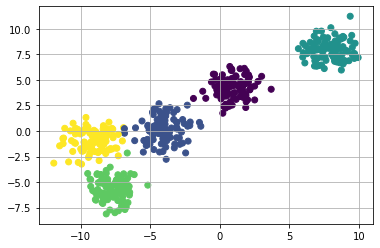

In [3]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [42]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color' : colors[idx]
    }
    
    clusters[idx] = cluster

In [43]:
clusters

{0: {'center': array([-8.9409959 , -7.14563759]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-0.53561781,  2.06215058]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-5.94072092, -9.21165595]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-4.4851139 , -6.42438486]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-5.24684379, -7.92807164]),
  'points': [],
  'color': 'red'}}

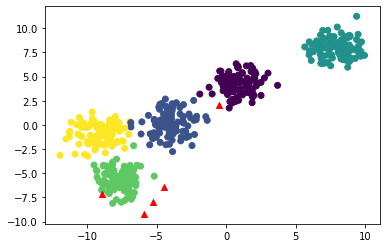

In [44]:
plt.scatter(X[:,0],X[:,1],c = y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [45]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [46]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [59]:
#Implementing E step 
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
        
        
#Implementing the M-Step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis =0)
            clusters[idx]['center'] = new_center
            
            clusters[idx]['points'] = []
    
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

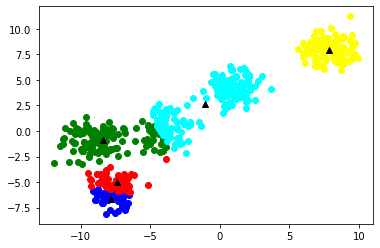

In [70]:
assign_clusters()
plot_clusters()
update_clusters()

#### Scikit Learn  K - Means

In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters = 5)

In [21]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

In [23]:
km.fit(X,y)

KMeans(n_clusters=5)

In [25]:
centers = km.cluster_centers_

In [26]:
labels = km.labels_

In [29]:
labels

array([4, 1, 2, 4, 4, 2, 0, 4, 1, 4, 1, 2, 1, 4, 2, 4, 1, 4, 4, 1, 3, 3,
       4, 2, 4, 3, 0, 0, 2, 0, 4, 0, 3, 3, 4, 3, 1, 1, 4, 3, 3, 3, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 4, 0, 4, 4, 3, 4, 4, 1, 2, 1, 2, 2, 4, 0, 1,
       2, 2, 3, 2, 3, 4, 3, 4, 3, 2, 4, 0, 3, 3, 2, 3, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 3, 4, 3, 3, 1, 4, 2, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 4,
       1, 0, 4, 1, 2, 3, 1, 0, 3, 2, 1, 2, 0, 4, 3, 0, 0, 0, 4, 4, 2, 2,
       4, 1, 1, 0, 2, 0, 2, 4, 4, 3, 2, 1, 0, 4, 1, 1, 4, 2, 4, 4, 2, 2,
       1, 3, 3, 0, 2, 4, 3, 1, 0, 3, 1, 3, 1, 3, 3, 3, 0, 4, 3, 1, 3, 0,
       4, 2, 1, 0, 1, 4, 1, 3, 0, 0, 3, 4, 2, 1, 3, 2, 0, 4, 0, 3, 2, 0,
       4, 4, 4, 3, 3, 1, 4, 0, 0, 4, 1, 4, 4, 4, 3, 1, 2, 1, 4, 4, 1, 0,
       2, 0, 0, 3, 4, 2, 4, 2, 0, 3, 2, 2, 4, 3, 4, 3, 2, 1, 2, 3, 3, 1,
       4, 4, 2, 2, 3, 1, 3, 4, 0, 1, 0, 4, 0, 0, 0, 0, 1, 3, 1, 4, 3, 1,
       0, 2, 1, 1, 1, 0, 4, 4, 2, 3, 3, 1, 2, 2, 4, 2, 0, 2, 1, 1, 0, 0,
       3, 0, 0, 1, 3, 4, 2, 3, 2, 0, 2, 2, 1, 4, 3,

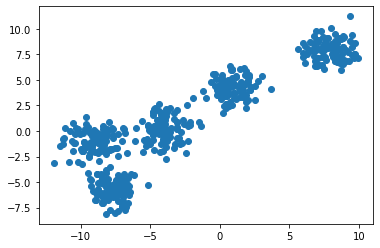

In [30]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0])
plt.show()